In [50]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV,cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')




In [51]:
school_df = pd.read_csv('updated_data.csv', index_col=0)
school_df['Target_encoded'] = np.where(school_df['Target_encoded']>=1,0,1)
X = school_df.drop('Target_encoded', axis=1).round(2)
y = school_df['Target_encoded']

In [52]:
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

## Logistic Regression

In [53]:
logreg = LogisticRegression(random_state=42)
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [54]:
# Checking for the best parameters
params_logreg ={
    'penalty':['l1', 'l2', None],
    'multi_class':['auto', 'ovr', 'multinomial'],
    'C':np.arange(0.001,0.1),
    'solver':['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}
gridlogreg=GridSearchCV(estimator=logreg,param_grid=params_logreg,cv=10,n_jobs=1)
gridlogreg.fit(X_train,y_train)
gridlogreg.best_params_

{'C': 0.001, 'multi_class': 'auto', 'penalty': None, 'solver': 'newton-cg'}

In [55]:
# Performing cross-validation
logreg_p = LogisticRegression(C = 0.001,max_iter=300, multi_class = 'auto', penalty = None, solver = 'newton-cholesky',random_state=42)
scores = cross_val_score(logreg_p, X_train, y_train, cv=10)  # 10-fold cross-validation

# Printing the scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

Cross-validation scores: [0.85875706 0.84745763 0.8700565  0.85310734 0.8559322  0.87570621
 0.89265537 0.86440678 0.84745763 0.85269122]
Mean cross-validation score: 0.8618227941294153


In [56]:
logreg_p.fit(X_train,y_train)
train_pred = logreg_p.predict(X_train)
test_pred = logreg_p.predict(X_test)
logreg_pred_proba=logreg_p.predict_proba(X_test)[:,1]
print('training accuracy: ',accuracy_score(train_pred,y_train))
print('testing accuracy: ',accuracy_score(test_pred,y_test))

training accuracy:  0.8623905057925968
testing accuracy:  0.8621468926553673


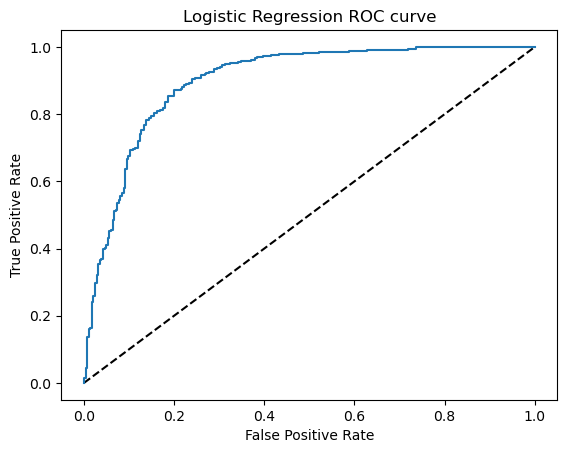

In [57]:
# Plotting the roc_curve
fpr,tpr,threshold=roc_curve(y_test,logreg_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.show()

In [58]:
# Calculating the area under the curve
roc_auc_score(y_test,logreg_pred_proba)

0.8981216751423684

In [59]:
print("Confusion matrix:\n", confusion_matrix(y_test, test_pred))
print("Classification report:\n", classification_report(y_test, test_pred))

Confusion matrix:
 [[198  86]
 [ 36 565]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.70      0.76       284
           1       0.87      0.94      0.90       601

    accuracy                           0.86       885
   macro avg       0.86      0.82      0.83       885
weighted avg       0.86      0.86      0.86       885



In [60]:
def plot_learning_curve(model):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01,1,50), verbose=1)
   
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Training scores")
    plt.plot(train_sizes, test_mean, label="Testing scores")

    plt.title(f'{model} Learning curve')
    plt.xlabel('Training size')
    plt.ylabel('Accuracy score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
    

[learning_curve] Training set sizes: [  31   96  160  224  289  353  417  482  546  611  675  739  804  868
  932  997 1061 1125 1190 1254 1318 1383 1447 1511 1576 1640 1704 1769
 1833 1898 1962 2026 2091 2155 2219 2284 2348 2412 2477 2541 2605 2670
 2734 2798 2863 2927 2991 3056 3120 3185]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   27.2s finished


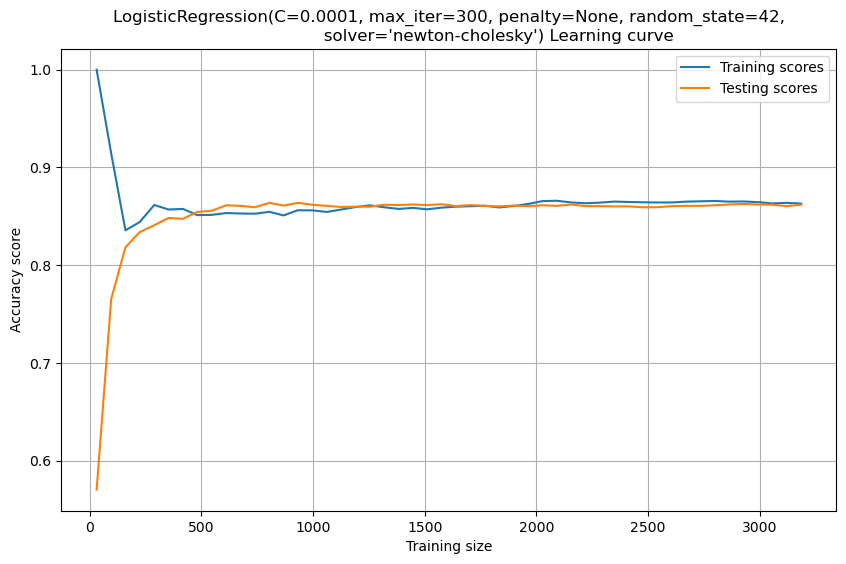

In [61]:
plot_learning_curve(logreg_p)

## Traditional Machine Learning Models  
1. Decision Trees
2. Random Forests
3. Support Vector Machines
4. Gradient Boosting Machines (e.g., XGBmances

## Decision Tree Classifier

In [62]:
dt = DecisionTreeClassifier()
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [63]:
# Checking for the best parameters
params_dt ={
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_features':['sqrt', 'log2', None],
    'max_depth':np.arange(1,10,1),
    'class_weight':['balanced', 'balanced_subsample']
}

griddt=RandomizedSearchCV(dt,params_dt, n_iter=100,
    scoring='accuracy',
    cv=10,
    random_state=42,
    n_jobs=-1)
griddt.fit(X_train,y_train)
griddt.best_params_

{'max_features': None,
 'max_depth': 5,
 'criterion': 'entropy',
 'class_weight': 'balanced'}

In [64]:
# Performing cross-validation
dt_p = DecisionTreeClassifier(
 max_features=None,
 max_depth= 4,
 criterion='log_loss',
 class_weight='balanced')
dt_scores = cross_val_score(dt_p, X_train, y_train, cv=10)  # 10-fold cross-validation

# Printing the scores
print("Cross-validation scores:", dt_scores)
print("Mean cross-validation score:", np.mean(dt_scores))

Cross-validation scores: [0.83333333 0.8220339  0.86158192 0.84180791 0.8559322  0.85875706
 0.87288136 0.85028249 0.83333333 0.8470255 ]
Mean cross-validation score: 0.8476968998575567


In [65]:
dt_p.fit(X_train,y_train)
dt_train_pred = dt_p.predict(X_train)
dt_test_pred = dt_p.predict(X_test)
dt_pred_proba=dt_p.predict_proba(X_test)[:,1]
print('training accuracy: ',accuracy_score(dt_train_pred,y_train))
print('testing accuracy: ',accuracy_score(dt_test_pred,y_test))

training accuracy:  0.851653009324668
testing accuracy:  0.8519774011299435


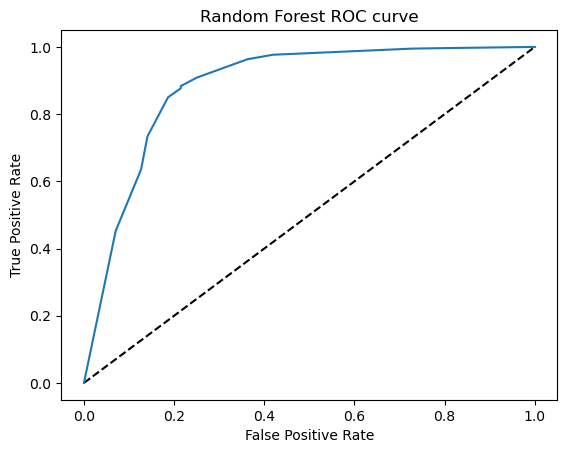

In [66]:
# Plotting the roc_curve
fpr,tpr,threshold=roc_curve(y_test,dt_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.show()

In [67]:
# Calculating the area under the curve
roc_auc_score(y_test,dt_pred_proba)

0.8844209181879965

In [68]:
print("Confusion matrix:\n", confusion_matrix(y_test, dt_test_pred))
print("Classification report:\n", classification_report(y_test, dt_test_pred))

Confusion matrix:
 [[223  61]
 [ 70 531]]
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.77       284
           1       0.90      0.88      0.89       601

    accuracy                           0.85       885
   macro avg       0.83      0.83      0.83       885
weighted avg       0.85      0.85      0.85       885



[learning_curve] Training set sizes: [  31   96  160  224  289  353  417  482  546  611  675  739  804  868
  932  997 1061 1125 1190 1254 1318 1383 1447 1511 1576 1640 1704 1769
 1833 1898 1962 2026 2091 2155 2219 2284 2348 2412 2477 2541 2605 2670
 2734 2798 2863 2927 2991 3056 3120 3185]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.2s finished


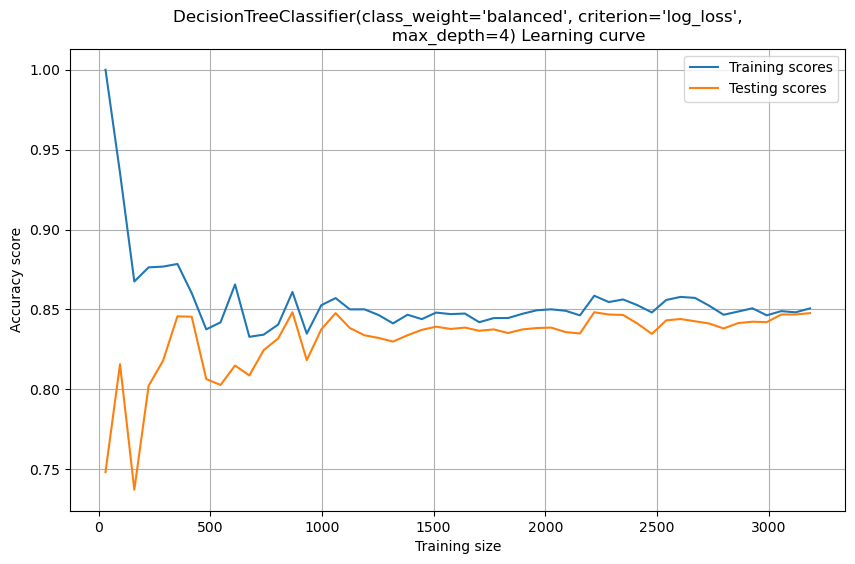

In [69]:
plot_learning_curve(dt_p)

## Support Vector Machine

In [70]:
svm = SVC()
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [71]:
# Checking for the best parameters
params_svm ={
    'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'gamma':['scale', 'auto'],
   'C':np.arange(1,10,1),
    'class_weight':['dict','balanced']
}

gridsvm=RandomizedSearchCV(svm,params_svm, n_iter=100,
    scoring='accuracy',
    cv=10,
    random_state=42,
    n_jobs=-1)
gridsvm.fit(X_train,y_train)
gridsvm.best_params_

In [72]:
# Performing cross-validation
svm_p = SVC(kernel="linear", gamma='auto', C=2, random_state=42)
svm_scores = cross_val_score(svm_p, X_train, y_train, cv=10)  # 10-fold cross-validation

# Printing the scores
print("Cross-validation scores:", svm_scores)
print("Mean cross-validation score:", np.mean(svm_scores))

Cross-validation scores: [0.83898305 0.82768362 0.85875706 0.85310734 0.85875706 0.86158192
 0.86158192 0.85875706 0.83050847 0.84135977]
Mean cross-validation score: 0.8491077287495399


In [73]:
svm_p.fit(X_train,y_train)
svm_train_pred = svm_p.predict(X_train)
svm_test_pred = svm_p.predict(X_test)
print('training accuracy: ',accuracy_score(svm_train_pred,y_train))
print('testing accuracy: ',accuracy_score(svm_test_pred,y_test))

training accuracy:  0.8505227465385702
testing accuracy:  0.848587570621469


In [74]:
print("Confusion matrix:\n", confusion_matrix(y_test, svm_test_pred))
print("Classification report:\n", classification_report(y_test, svm_test_pred))

Confusion matrix:
 [[189  95]
 [ 39 562]]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.67      0.74       284
           1       0.86      0.94      0.89       601

    accuracy                           0.85       885
   macro avg       0.84      0.80      0.82       885
weighted avg       0.85      0.85      0.84       885



[learning_curve] Training set sizes: [  31   96  160  224  289  353  417  482  546  611  675  739  804  868
  932  997 1061 1125 1190 1254 1318 1383 1447 1511 1576 1640 1704 1769
 1833 1898 1962 2026 2091 2155 2219 2284 2348 2412 2477 2541 2605 2670
 2734 2798 2863 2927 2991 3056 3120 3185]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  7.3min finished


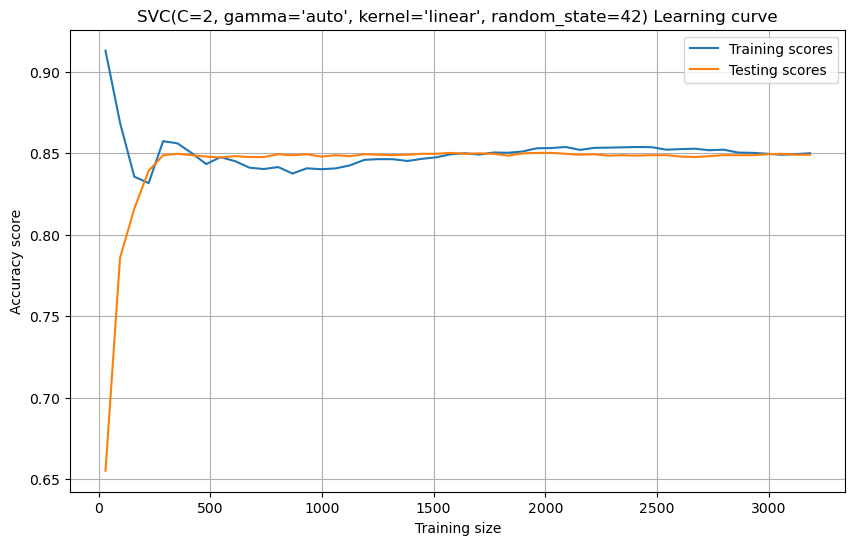

In [75]:
plot_learning_curve(svm_p)

## Random Forest Classifier

In [76]:
rf = RandomForestClassifier()
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [77]:
# Checking for the best parameters
params_rf ={
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_features':['sqrt', 'log2', None],
    'max_depth':np.arange(1,10,1),
    'n_estimators':np.arange(100,1000,100),
    'class_weight':['balanced', 'balanced_subsample']
}

gridrf=RandomizedSearchCV(rf,params_rf, n_iter=100,
    scoring='accuracy',
    cv=10,
    random_state=42,
    n_jobs=-1)
gridrf.fit(X_train,y_train)
gridrf.best_params_

In [78]:
# Performing cross-validation
rf_p = RandomForestClassifier(n_estimators= 300,
 max_features='sqrt',
 max_depth= 9,
 criterion='gini',
 class_weight='balanced')
rf_scores = cross_val_score(rf_p, X_train, y_train, cv=10)  # 10-fold cross-validation

# Printing the scores
print("Cross-validation scores:", rf_scores)
print("Mean cross-validation score:", np.mean(rf_scores))

Cross-validation scores: [0.85310734 0.83615819 0.87288136 0.8559322  0.85310734 0.87288136
 0.9039548  0.87288136 0.88135593 0.8611898 ]
Mean cross-validation score: 0.8663449688705367


In [79]:
rf_p.fit(X_train,y_train)
rf_train_pred = rf_p.predict(X_train)
rf_test_pred = rf_p.predict(X_test)
rf_pred_proba=rf_p.predict_proba(X_test)[:,1]
print('training accuracy: ',accuracy_score(rf_train_pred,y_train))
print('testing accuracy: ',accuracy_score(rf_test_pred,y_test))

training accuracy:  0.919468776490534
testing accuracy:  0.8677966101694915


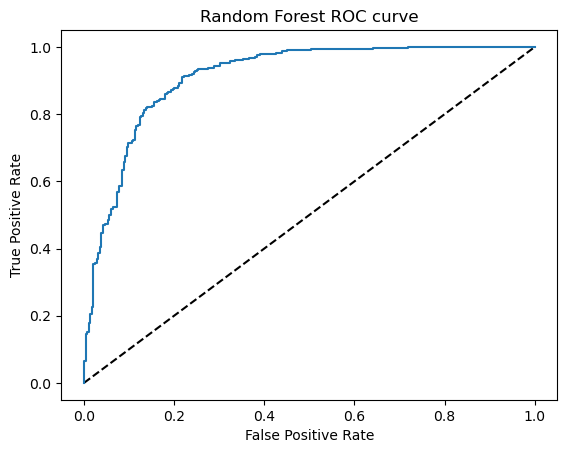

In [80]:
# Plotting the roc_curve
fpr,tpr,threshold=roc_curve(y_test,rf_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.show()

In [81]:
# Calculating the area under the curve
roc_auc_score(y_test,rf_pred_proba)

0.9110520025309929

In [82]:
print("Confusion matrix:\n", confusion_matrix(y_test, rf_test_pred))
print("Classification report:\n", classification_report(y_test, rf_test_pred))

Confusion matrix:
 [[216  68]
 [ 49 552]]
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       284
           1       0.89      0.92      0.90       601

    accuracy                           0.87       885
   macro avg       0.85      0.84      0.85       885
weighted avg       0.87      0.87      0.87       885



[learning_curve] Training set sizes: [  31   96  160  224  289  353  417  482  546  611  675  739  804  868
  932  997 1061 1125 1190 1254 1318 1383 1447 1511 1576 1640 1704 1769
 1833 1898 1962 2026 2091 2155 2219 2284 2348 2412 2477 2541 2605 2670
 2734 2798 2863 2927 2991 3056 3120 3185]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.2min finished


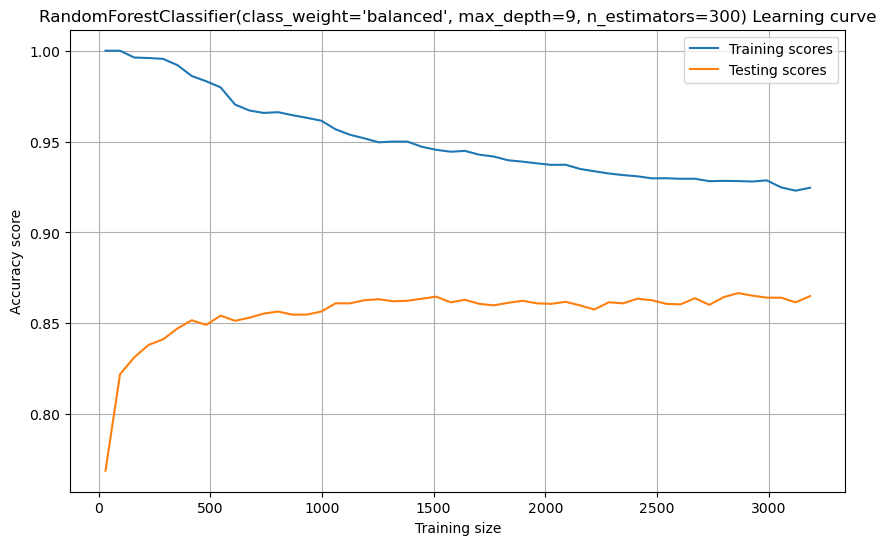

In [83]:
plot_learning_curve(rf_p)

## Gradient Boosting Classifier

In [84]:
gbt = GradientBoostingClassifier()
gbt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [85]:
# Checking for the best parameters
params_gbt ={
    'subsample':np.arange(0.1,1),
    'max_features':['sqrt', 'log2', None],
    'max_depth':np.arange(1,10,1),
    'n_estimators':np.arange(100,1000,100)
}

gridgbt=RandomizedSearchCV(gbt,params_gbt, n_iter=100,
    scoring='accuracy',
    cv=10,
    random_state=42,
    n_jobs=-1)
gridgbt.fit(X_train,y_train)
gridgbt.best_params_

{'subsample': 0.1, 'n_estimators': 700, 'max_features': 'sqrt', 'max_depth': 1}

In [86]:
# Performing cross-validation
gbt_p = GradientBoostingClassifier(n_estimators= 800,
 max_features='log2',
 max_depth= 1,
 subsample=0.1)
gbt_scores = cross_val_score(gbt_p, X_train, y_train, cv=10)  # 10-fold cross-validation

# Printing the scores
print("Cross-validation scores:", gbt_scores)
print("Mean cross-validation score:", np.mean(gbt_scores))

Cross-validation scores: [0.8559322  0.85875706 0.86158192 0.88135593 0.86158192 0.88418079
 0.89265537 0.86158192 0.8700565  0.86968839]
Mean cross-validation score: 0.869737200108833


In [87]:
gbt_p.fit(X_train,y_train)
gbt_train_pred = gbt_p.predict(X_train)
gbt_test_pred = gbt_p.predict(X_test)
gbt_pred_proba=gbt_p.predict_proba(X_test)[:,1]
print('training accuracy: ',accuracy_score(gbt_train_pred,y_train))
print('testing accuracy: ',accuracy_score(gbt_test_pred,y_test))

training accuracy:  0.8770839220118678
testing accuracy:  0.8587570621468926


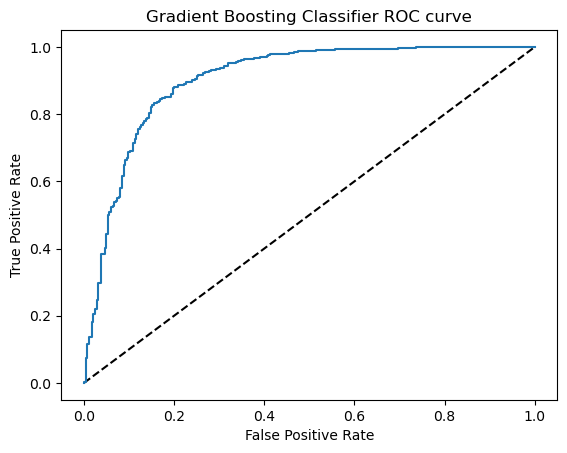

In [88]:
# Plotting the roc_curve
fpr,tpr,threshold=roc_curve(y_test,gbt_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier ROC curve')
plt.show()

In [89]:
# Calculating the area under the curve
roc_auc_score(y_test,gbt_pred_proba)

0.9026563708373369

In [90]:
print("Confusion matrix:\n", confusion_matrix(y_test, gbt_test_pred))
print("Classification report:\n", classification_report(y_test, gbt_test_pred))

Confusion matrix:
 [[197  87]
 [ 38 563]]
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.69      0.76       284
           1       0.87      0.94      0.90       601

    accuracy                           0.86       885
   macro avg       0.85      0.82      0.83       885
weighted avg       0.86      0.86      0.85       885



[learning_curve] Training set sizes: [  31   96  160  224  289  353  417  482  546  611  675  739  804  868
  932  997 1061 1125 1190 1254 1318 1383 1447 1511 1576 1640 1704 1769
 1833 1898 1962 2026 2091 2155 2219 2284 2348 2412 2477 2541 2605 2670
 2734 2798 2863 2927 2991 3056 3120 3185]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  6.4min finished


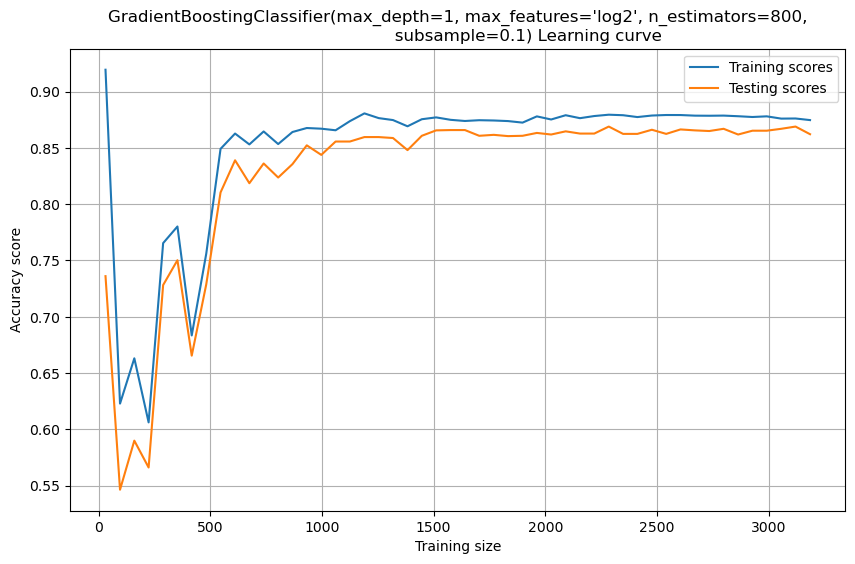

In [91]:
plot_learning_curve(gbt_p)

## Deep Learning Models 
1.  Design and implement a neural network architecture2. • Train the neural network using TensorFlow or PyTorc3. 
• Experiment with different architectures (e.g., number of layers, neurons)


In [93]:
import pickle
with open('logisticRegression_model', 'wb' ) as LR:
    pickle.dump(logreg_p,LR)

with open('RandomForestClassifier_model', 'wb' ) as RFC:
    pickle.dump(rf_p,RFC)

with open('DecisionTreeClassifier_model', 'wb' ) as DTC:
    pickle.dump(dt_p,DTC)

with open('SVM_model', 'wb' ) as SVM:
    pickle.dump(svm_p,SVM)

with open('GradientBoostClassifier_model', 'wb' ) as GBC:
    pickle.dump(gbt_p,GBC)